In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
# import sympy as sp

## Soxve for the transient response of this circuit:

DC, switch is CxOSING at time=0

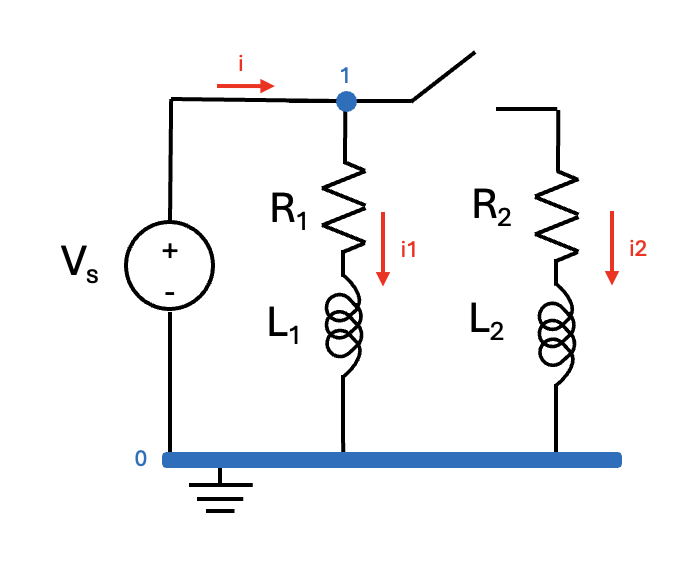


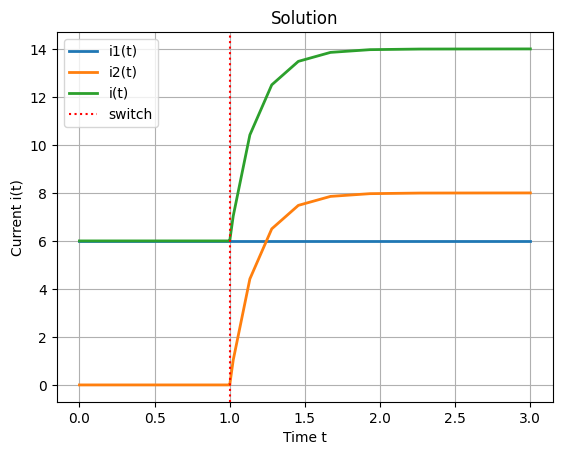

In [ ]:
# Constants: 
R = np.array([4, 3])            # ohms
L = np.array([0.25, 0.5])       # henrys
Vs = 24                         # volts

# need to find intial conditions
i_0 = Vs / R[0]         # Ohm's law - initial current flowing through connected branch
i1_0 = i_0              # initially no current in the other branch so... 
i2_0 = 0                # "    "

# determine the differential equations
def dxdt(t, x):
    A = np.array([
        [-R[0]/L[0], 0],
        [0, -R[1]/L[1]]
    ])
    b = np.array([
        Vs / L[0],
        Vs / L[1]
    ])
    return A @ x + b

# simulate the response
tspan = (0,2)
x0 = [i1_0, i2_0]
sol = spi.solve_ivp(dxdt, tspan, x0)

# add initial conditions for plotting
t_init = 1      # length of time for initial 
step = 0.1      # step size
t_init_rng = np.arange(0,t_init,step)               # make steps
i1_init = i1_0 * np.ones(t_init_rng.shape)          # make init i1 signal
i2_init = i2_0 * np.ones(t_init_rng.shape)          # i2
i_init = i_0 * np.ones(t_init_rng.shape)            # i
t = np.concatenate((t_init_rng, sol.t+t_init))      # make total time vector
i1_t = np.concatenate((i1_init, sol.y[0]))          # concat
i2_t = np.concatenate((i2_init, sol.y[1]))          # concat
i_t = np.concatenate((i_init, sol.y[0]+sol.y[1]))   # concat

# plot the response
plt.plot(t, i1_t, label='i1(t)',linewidth=2)
plt.plot(t, i2_t, label='i2(t)',linewidth=2)
plt.plot(t, i_t, label='i(t)',linewidth=2)
plt.axvline(x=t_init,label='switch',color='r',linestyle=':')
plt.xlabel('Time t')
plt.ylabel('Current i(t)')
plt.title('Solution')
plt.grid(True)
plt.legend()
plt.show()

## Completed, write up in the paper as a basic example

In [ ]:
## Old solve_IVP examples

# # determine the differential equations
# def dxdt(t, x):
#     dx = -x
#     return dx
# # simulate the response
# tspan = (0,20)
# x0 = [1]
# sol = spi.solve_ivp(dxdt, tspan, x0)

# # determine the differential equations
# def dxdt(t, x):
#     dx1 = -x[0]**2
#     dx2 = -2*x[1]**2
#     return [dx1, dx2]
# # simulate the response
# tspan = (0,20)
# x0 = [1, 1]
# sol = spi.solve_ivp(dxdt, tspan, x0)

# def dxdt(t,x):
#     dx1 = -R[0]/L[0]*x[0] + Vs / L[0]
#     dx2 = -R[1]/L[1]*x[1] + Vs / L[1]
#     return [dx1, dx2]

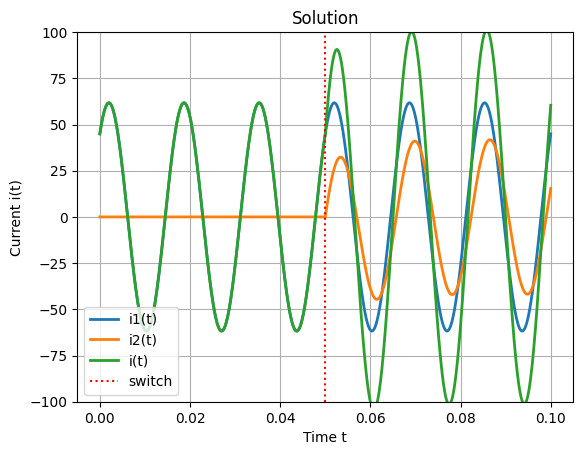

In [131]:
## Same circuit as above but with AC everything

# Constants: 
Vs = 240                        # volts  (rms) (phasor)
f = 60                          # hz 
R = np.array([4, 3])            # ohms
L = np.array([0.01, 0.02])      # henrys
Z = np.array([R[0] + 1j*2*np.pi*f*L[0], 
              R[1] + 1j*2*np.pi*f*L[1],])   # complex impedance, ohms
# source voltage as fn of time
def Vs_t(t,Vs,f):
    return Vs * np.sqrt(2) * np.cos(2*np.pi*f*t)

# need to find intial conditions
Is = Vs / Z[0]                  # phasor, rms
# source current as fn of time (before switch)
def Is_t(t,Is,f):
    return np.abs(Is)*np.sqrt(2) * np.cos(2*np.pi*f*t + np.angle(Is))
Is0 = Is_t(0,Is,f)
i1_0 = Is0
i2_0 = 0

# determine the differential equations
def dxdt(t, x):
    A = np.array([
        [-R[0]/L[0], 0],
        [0, -R[1]/L[1]]
    ])
    b = np.array([
        Vs_t(t,Vs,f) / L[0],
        Vs_t(t,Vs,f) / L[1]
    ])
    return A @ x + b

# simulate the response
tspan = (0.05,0.1)
x0 = [i1_0, i2_0]
sol = spi.solve_ivp(dxdt, tspan, x0, max_step=0.0001)

# add initial conditions for plotting
t_init = 0.05      # length of time for initial 
step = 0.0001      # step size
t_init_rng = np.arange(0,t_init,step)               # make steps
i1_init = Is_t(t_init_rng,Is,f)                     # make init i1 signal
i2_init = i2_0 * np.ones(t_init_rng.shape)          # i2
i_init = Is_t(t_init_rng,Is,f)                      # i
t = np.concatenate((t_init_rng, sol.t))      # make total time vector
i1_t = np.concatenate((i1_init, sol.y[0]))          # concat
i2_t = np.concatenate((i2_init, sol.y[1]))          # concat
i_t = np.concatenate((i_init, sol.y[0]+sol.y[1]))   # concat

# plot the response
plt.plot(t, i1_t, label='i1(t)',linewidth=2)
plt.plot(t, i2_t, label='i2(t)',linewidth=2)
plt.plot(t, i_t, label='i(t)',linewidth=2)
plt.axvline(x=t_init,label='switch',color='r',linestyle=':')
plt.xlabel('Time t')
plt.ylabel('Current i(t)')
plt.title('Solution')
plt.grid(True)
plt.ylim([-100,100])
plt.legend()
plt.show()

## Completed, write up in the paper as a basic example

## Repeat analysis but with a line impedance before the switched load

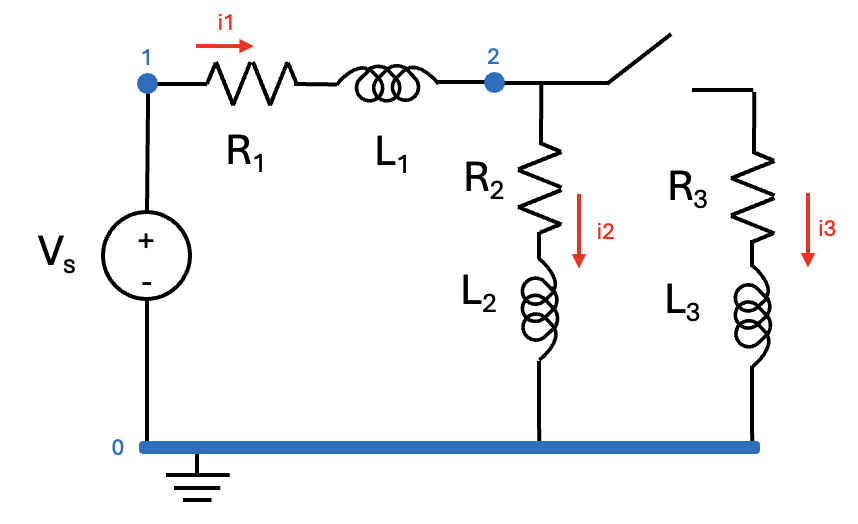

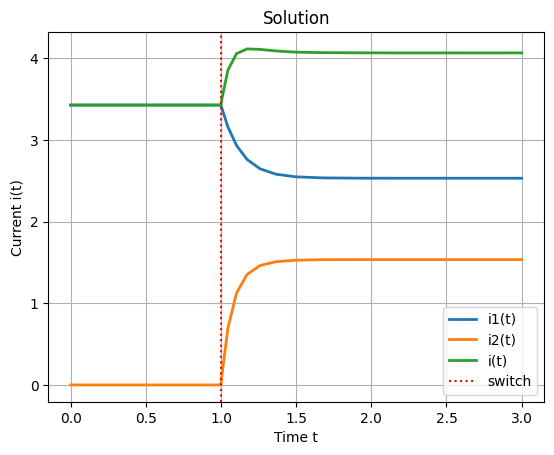

In [132]:
## Cicuit above, line impedance, plus a switched load, back to DC

# Constants: 
R = np.array([4, 3, 5])            # ohms
L = np.array([0.25, 0.5, 1/3])       # henrys
Vs = 24                         # volts

# need to find intial conditions
i_0 = Vs / (R[0] + R[1])         # Ohm's law - initial current flowing through connected branch
i1_0 = i_0              # initially no current in the other branch so... 
i2_0 = 0                # "    "

### Algebra out the wazz
# KVL 1st loop:
# Vs = R1x1 + L1dx1 + R2x2 + L2dx2
# KVL outer loop:
# Vs = R1x1 + L1dx1 + R3x3 + L3dx3
# KVL second loop:
# 0 = R3x3 + L3dx3 - R2x2 - L2dx2
# solve second loop equation for expressions for dx2 and dx3
# plug x1 = x2 + x3 and dx1 = dx2 + dx3 into 1st and outer 
# left with: 
# dx2 = 
# dx3 = 

# determine the differential equations
def dxdt(t, x):
    c_dx2 = (L[0]+L[1]+L[0]*L[1]/L[2])
    c_dx3 = (L[0]+L[2]+L[0]*L[2]/L[1])
    A = np.array([
        [-(R[0] + R[1] + L[0]*R[1]/L[2])/c_dx2, -(R[0] - L[0]*R[2]/L[2])/c_dx3        ],
        [-(R[0] - L[0]*R[1]/L[1])/c_dx3,        -(R[0] + R[2] + L[0]*R[2]/L[1])/c_dx3 ]
    ])
    b = np.array([
        Vs / c_dx2,
        Vs / c_dx3
    ])
    return A @ x + b

# simulate the response
tspan = (0,2)
x0 = [i1_0, i2_0]
sol = spi.solve_ivp(dxdt, tspan, x0)

# add initial conditions for plotting
t_init = 1      # length of time for initial 
step = 0.1      # step size
t_init_rng = np.arange(0,t_init,step)               # make steps
i1_init = i1_0 * np.ones(t_init_rng.shape)          # make init i1 signal
i2_init = i2_0 * np.ones(t_init_rng.shape)          # i2
i_init = i_0 * np.ones(t_init_rng.shape)            # i
t = np.concatenate((t_init_rng, sol.t+t_init))      # make total time vector
i1_t = np.concatenate((i1_init, sol.y[0]))          # concat
i2_t = np.concatenate((i2_init, sol.y[1]))          # concat
i_t = np.concatenate((i_init, sol.y[0]+sol.y[1]))   # concat

# plot the response
plt.plot(t, i1_t, label='i1(t)',linewidth=2)
plt.plot(t, i2_t, label='i2(t)',linewidth=2)
plt.plot(t, i_t, label='i(t)',linewidth=2)
plt.axvline(x=t_init,label='switch',color='r',linestyle=':')
plt.xlabel('Time t')
plt.ylabel('Current i(t)')
plt.title('Solution')
plt.grid(True)
plt.legend()
plt.show()

## done, put in the paper

/Users/danrussell/Library/CloudStorage/OneDrive-UniversityofVermont/Research/Comp Exam/Power System Analysis/.venv/lib/python3.12/site-packages/scipy/integrate/_ivp/base.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(t, y), dtype=dtype)


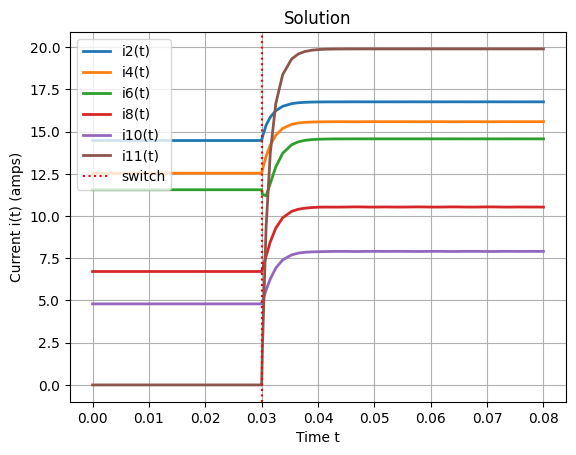

In [ ]:
## Full network - DC (Ex7)

# find initial states by solving steady state DC with inductors as shorts
np.random.seed(41)
zline = np.random.uniform(0.4, 0.9, size=(5)) + 1j * np.random.uniform(0.4, 0.9, size=(5))  # Random complex impedances
zload = np.random.uniform(5, 25, size=(6)) + 1j * np.random.uniform(0.5, 2.5, size=(6))        # Random complex loads with reasonable power factor
z = np.column_stack((zline, zload[0:5])).ravel()  # Combine line and load impedances
Vs = 240 + 0j  # Source voltage
y = 1 / z  # Admittance
g = np.real(y)  # convert Y to G
Y = np.array([[y[0]+y[1]+y[2], -y[2],           0,              0,              0],
              [-y[2],           y[2]+y[3]+y[4], -y[4],          0,              0],
              [0,               -y[4],          y[4]+y[5]+y[6], -y[6],          0],
              [0,               0,              -y[6],          y[6]+y[7]+y[8], -y[8]],
              [0,               0,              0,              -y[8],          y[8]+y[9]]])  # Admittance matrix
G = np.real(Y)  # convert Y to G
i = np.array([Vs * g[0], 0, 0, 0, 0])  # Current vector
V = np.linalg.inv(G) @ i  # Solve for voltages
V = np.real(V)              # convert to real
i0 = V / np.real(zload[0:5])    # compute current initial conditions

# deal with the new node and form R/L matrices
z = np.append(z,zload[-1])
L = np.imag(z) / 2/ np.pi / 60
R = np.real(z)
i0 = np.append(i0,0)            # add a zero for i11
def form_mat(xin):
    x = np.insert(xin,0,0)  # put a zero so the index lines up with my math
    X = np.array([  [x[1]+x[2], x[1],       x[1],       x[1],       x[1],       x[1]], 
                    [-x[2],     x[3]+x[4],  x[3],       x[3],       x[3],       x[3]], 
                    [0,         -x[4],      x[5]+x[6],  x[5],       x[5],       x[5]], 
                    [0,         0,          -x[6],      0,          0,          x[11]], 
                    [0,         0,          0,          x[7]+x[8],  x[7],       -x[11]], 
                    [0,         0,          0,          -x[8],      x[9]+x[10], 0]])
    return X
Lm = form_mat(L)
Lm_i = np.linalg.inv(Lm) 
Rm = form_mat(R)
v = np.array([Vs, 0, 0, 0, 0, 0])

# set up differential equation
def dxdt(t, x):
    dx = Lm_i @ v -  Lm_i @ Rm @ x
    return dx

# simulate the response
tspan = (0,0.05)
sol = spi.solve_ivp(dxdt, tspan, i0)

# add initial conditions for plotting
t_init = 0.03      # length of time for initial 
step = 0.005      # step size
t_init_rng = np.arange(0,t_init,step)               # make steps
i_init = np.ones((6,t_init_rng.shape[0])) * i0[:, np.newaxis]
t = np.concatenate((t_init_rng, sol.t+t_init))      # make total time vector
iall = np.concatenate((i_init,sol.y),axis=1)
i1 = np.sum(iall, axis=0)


idx_i = [2, 4, 6, 8, 10, 11]

# plot the response
for i in range(6):
    plt.plot(t, iall[i,:], label=f'i{idx_i[i]}(t)', linewidth=2)
# plt.plot(t, i1, label='i1(t)', linewidth=2)
plt.axvline(x=t_init,label='switch',color='r',linestyle=':')
plt.xlabel('Time t')
plt.ylabel('Current i(t) (amps)')
plt.grid(True)
plt.legend()
plt.show()




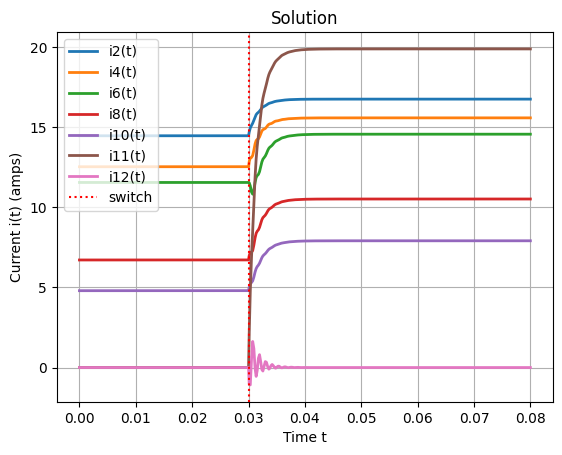

In [151]:
## Full network with Capacitor - DC (Fx)

# find initial states by solving steady state DC with inductors as shorts
z = np.column_stack((zline, zload[0:5])).ravel()  # Combine line and load impedances
Vs = 240 + 0j  # Source voltage
y = 1 / z  # Admittance
g = np.real(y)  # convert Y to G
Y = np.array([[y[0]+y[1]+y[2], -y[2],           0,              0,              0],
              [-y[2],           y[2]+y[3]+y[4], -y[4],          0,              0],
              [0,               -y[4],          y[4]+y[5]+y[6], -y[6],          0],
              [0,               0,              -y[6],          y[6]+y[7]+y[8], -y[8]],
              [0,               0,              0,              -y[8],          y[8]+y[9]]])  # Admittance matrix
G = np.real(Y)  # convert Y to G
i = np.array([Vs * g[0], 0, 0, 0, 0])  # Current vector
V = np.linalg.inv(G) @ i        # Solve for voltages
V = np.real(V)                  # convert to real
i0 = V / np.real(zload[0:5])    # compute current initial conditions
v6_0 = V[2]                     # pull out initial voltage at node 4 (called 6 because inductor/resistor 6)


# deal with the new node and form R/L matrices
z = np.append(z,zload[-1])
L = np.imag(z) / 2/ np.pi / 60
Xc = 92.21
C = 1/2/np.pi/f/Xc
R = np.real(z)
i0 = np.append(i0,0)            # add a zero for i11
i0 = np.append(i0,0)            # add a zero for i12
init_condish = np.append(i0,v6_0) # put v6 initial condition on the end
def form_mat2(xin,LorR,C):
    # C - capacitance, if needed
    # L or R: for R, = 1, for L, = 0
    x = np.insert(xin,0,0)  # put a zero at the beginning so the index lines up with my math
    if LorR == 1:           # R matrix
        X = np.array([  [x[1]+x[2], x[1],       x[1],       x[1],       x[1],       x[1],       x[1],   0], 
                        [-x[2],     x[3]+x[4],  x[3],       x[3],       x[3],       x[3],       x[3],   0], 
                        [0,         -x[4],      x[5],       x[5],       x[5],       x[5],       x[5],   1], 
                        [0,         0,          x[6],       0,          0,          0,          0,      -1], 
                        [0,         0,          0,          0,          0,          x[11],      0,      -1],
                        [0,         0,          0,          0,          0,          0,          1/C,    0],
                        [0,         0,          0,          x[7]+x[8],  x[7],       0,          0,      -1], 
                        [0,         0,          0,          -x[8],      x[9]+x[10], 0,          0,      0]])
    else:                   # L matrix
        X = np.array([  [x[1]+x[2], x[1],       x[1],       x[1],       x[1],       x[1],       x[1],   0], 
                        [-x[2],     x[3]+x[4],  x[3],       x[3],       x[3],       x[3],       x[3],   0], 
                        [0,         -x[4],      x[5],       x[5],       x[5],       x[5],       x[5],   0], 
                        [0,         0,          x[6],       0,          0,          0,          0,      0], 
                        [0,         0,          0,          0,          0,          x[11],      0,      0],
                        [0,         0,          0,          0,          0,          0,          0,      -1],
                        [0,         0,          0,          x[7]+x[8],  x[7],       0,          0,      0], 
                        [0,         0,          0,          -x[8],      x[9]+x[10], 0,          0,      0]])  
    return X
Lm = form_mat2(L,0,0)
Lm_i = np.linalg.inv(Lm) 
Rm = form_mat2(R,1,C)
v = np.array([Vs, 0, 0, 0, 0, 0, 0, 0])

# set up differential equation
def dxdt(t, x):
    dx = Lm_i @ v -  Lm_i @ Rm @ x
    return dx

# simulate the response
tspan = (0,0.05)
sol = spi.solve_ivp(dxdt, tspan, init_condish)

# add initial conditions for plotting
t_init = 0.03      # length of time for initial 
step = 0.005      # step size
t_init_rng = np.arange(0,t_init,step)               # make steps
i_init = np.ones((7,t_init_rng.shape[0])) * i0[:, np.newaxis]
v_init = np.ones((t_init_rng.shape[0])) * v6_0
t = np.concatenate((t_init_rng, sol.t+t_init))      # make total time vector
iall = np.concatenate((i_init,sol.y[0:7,:]),axis=1)
vall = np.concatenate((v_init,sol.y[-1,:]))
i1 = np.sum(iall, axis=0)


idx_i = [2, 4, 6, 8, 10, 11, 12]

# plot the response
for i in range(7):
    plt.plot(t, iall[i,:], label=f'i{idx_i[i]}(t)', linewidth=2)
# plt.plot(t, vall, label='v6(t)', linewidth=2)
plt.axvline(x=t_init,label='switch',color='r',linestyle=':')
plt.xlabel('Time t')
plt.ylabel('Current i(t) (amps)')
plt.title('Solution')
plt.grid(True)
plt.legend()
plt.show()



Network being studied: but with an AC source

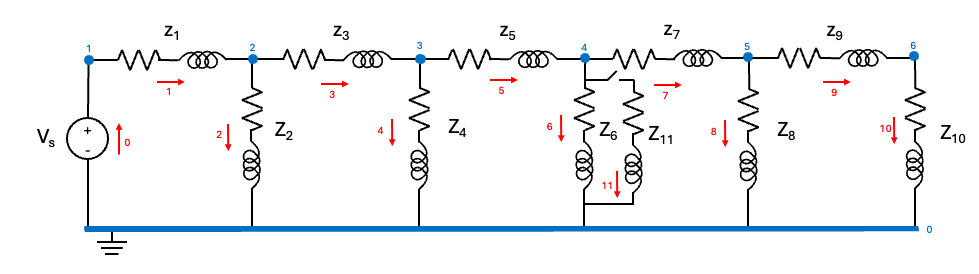

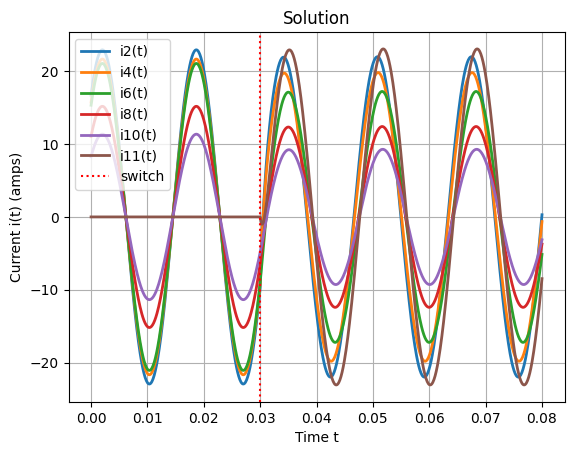

/var/folders/gy/4p5kc3hj1rl8c0ls_8d43n740000gn/T/ipykernel_86820/3905872668.py:104: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


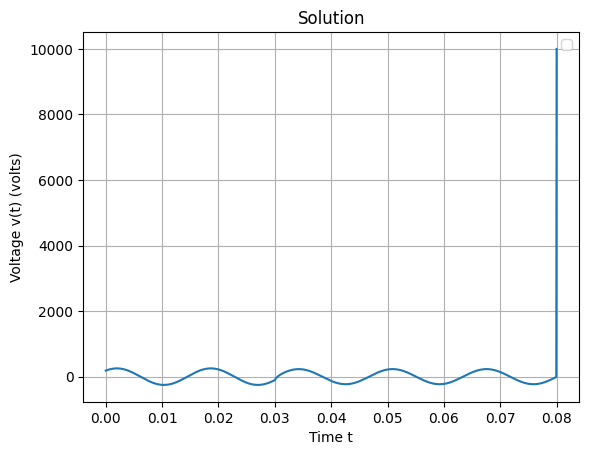

In [110]:
## Full network - AC (Ex9)

# find initial states by solving AC Steady State
np.random.seed(41)
zline = np.random.uniform(0.4, 0.9, size=(5)) + 1j * np.random.uniform(0.4, 0.9, size=(5))  # Random complex impedances
zload = np.random.uniform(5, 25, size=(6)) + 1j * np.random.uniform(0.5, 2.5, size=(6))        # Random complex loads with reasonable power factor
z = np.column_stack((zline, zload[0:5])).ravel()  # Combine line and load impedances
Vs = 240 + 0j  # Source voltage
f = 60
y = 1 / z  # Admittance
Y = np.array([[y[0]+y[1]+y[2], -y[2],           0,              0,              0],
              [-y[2],           y[2]+y[3]+y[4], -y[4],          0,              0],
              [0,               -y[4],          y[4]+y[5]+y[6], -y[6],          0],
              [0,               0,              -y[6],          y[6]+y[7]+y[8], -y[8]],
              [0,               0,              0,              -y[8],          y[8]+y[9]]])  # Admittance matrix
i = np.array([Vs * y[0], 0, 0, 0, 0])  # Current vector
V = np.linalg.inv(Y) @ i  # Solve for voltages
i0rms = V / zload[0:5]         # compute current initial conditions (phasor)

# convert from phasor to v(t),i(t)
# voltage as fn of time
def V_t(t,Vrms,f):
    return np.abs(Vrms)*np.sqrt(2) * np.cos(2*np.pi*f*t)
# current as fn of time (before switch)
def I_t(t,Irms,f):
    return np.abs(Irms)*np.sqrt(2) * np.cos(2*np.pi*f*t + np.angle(Is))
i0 = I_t(0.03,i0rms,f)
v0 = V_t(0.03,Vs,f)



# deal with the new node and form R/L matrices
z = np.append(z,zload[-1])              # add z11 to the end of the line
L = np.imag(z) / 2/ np.pi / f           # compute L's from z values
R = np.real(z)                          # compute R's 
i0 = np.append(i0,0)                    # add a zero for i11
i0rms = np.append(i0rms,0+0j)           # add a zero for i11
def form_mat(xin):
    x = np.insert(xin,0,0)  # put a zero so the index lines up with my math
    X = np.array([  [x[1]+x[2], x[1],       x[1],       x[1],       x[1],       x[1]], 
                    [-x[2],     x[3]+x[4],  x[3],       x[3],       x[3],       x[3]], 
                    [0,         -x[4],      x[5]+x[6],  x[5],       x[5],       x[5]], 
                    [0,         0,          -x[6],      0,          0,          x[11]], 
                    [0,         0,          0,          x[7]+x[8],  x[7],       -x[11]], 
                    [0,         0,          0,          -x[8],      x[9]+x[10], 0]])
    return X
Lm = form_mat(L)
Lm_i = np.linalg.inv(Lm) 
Rm = form_mat(R)


# set up differential equation
def dxdt(t, x):
    Vs_t = V_t(t,Vs,f)
    v = np.array([Vs_t, 0, 0, 0, 0, 0])
    dx = Lm_i @ v -  Lm_i @ Rm @ x
    return dx

# simulate the response
tspan = (0.03,0.08)
sol = spi.solve_ivp(dxdt, tspan, i0, max_step=0.0001)

# add initial conditions for plotting
t_init = 0.03      # length of time for initial 
step = 0.0001      # step size
t_init_rng = np.arange(0,t_init,step)               # make steps
i_init = np.zeros((6,t_init_rng.shape[0]))
for i,t in enumerate(t_init_rng):
    i_init[:,i] = I_t(t,i0rms,f)
t = np.concatenate((t_init_rng, sol.t))      # make total time vector
iall = np.concatenate((i_init,sol.y),axis=1)
i1 = np.sum(iall, axis=0)


idx_i = [2, 4, 6, 8, 10, 11]

# plot the response - current
for i in range(6):
    plt.plot(t, iall[i,:], label=f'i{idx_i[i]}(t)', linewidth=2)
# plt.plot(t, i1, label='i1(t)', linewidth=2)
plt.axvline(x=t_init,label='switch',color='r',linestyle=':')
plt.xlabel('Time t')
plt.ylabel('Current i(t) (amps)')
plt.title('Solution')
plt.grid(True)
plt.legend()
plt.show()


# compute voltage response
didt = np.gradient(iall[1,:])
v1 = np.real(zload[0])*iall[1,:] + np.imag(zload[0])*didt
v1[-1] = 10000      # remove this line
############################################
# ^^ fix this to be the correct values
############################################

# plot the response - voltage
plt.plot(t,v1)
plt.xlabel('Time t')
plt.ylabel('Voltage v(t) (volts)')
plt.title('Solution')
plt.grid(True)
plt.legend()
plt.show()

# done, 1 of the two plots to ACTUALLY use... exciting...

Solving this system, using laplace domain shenanigans

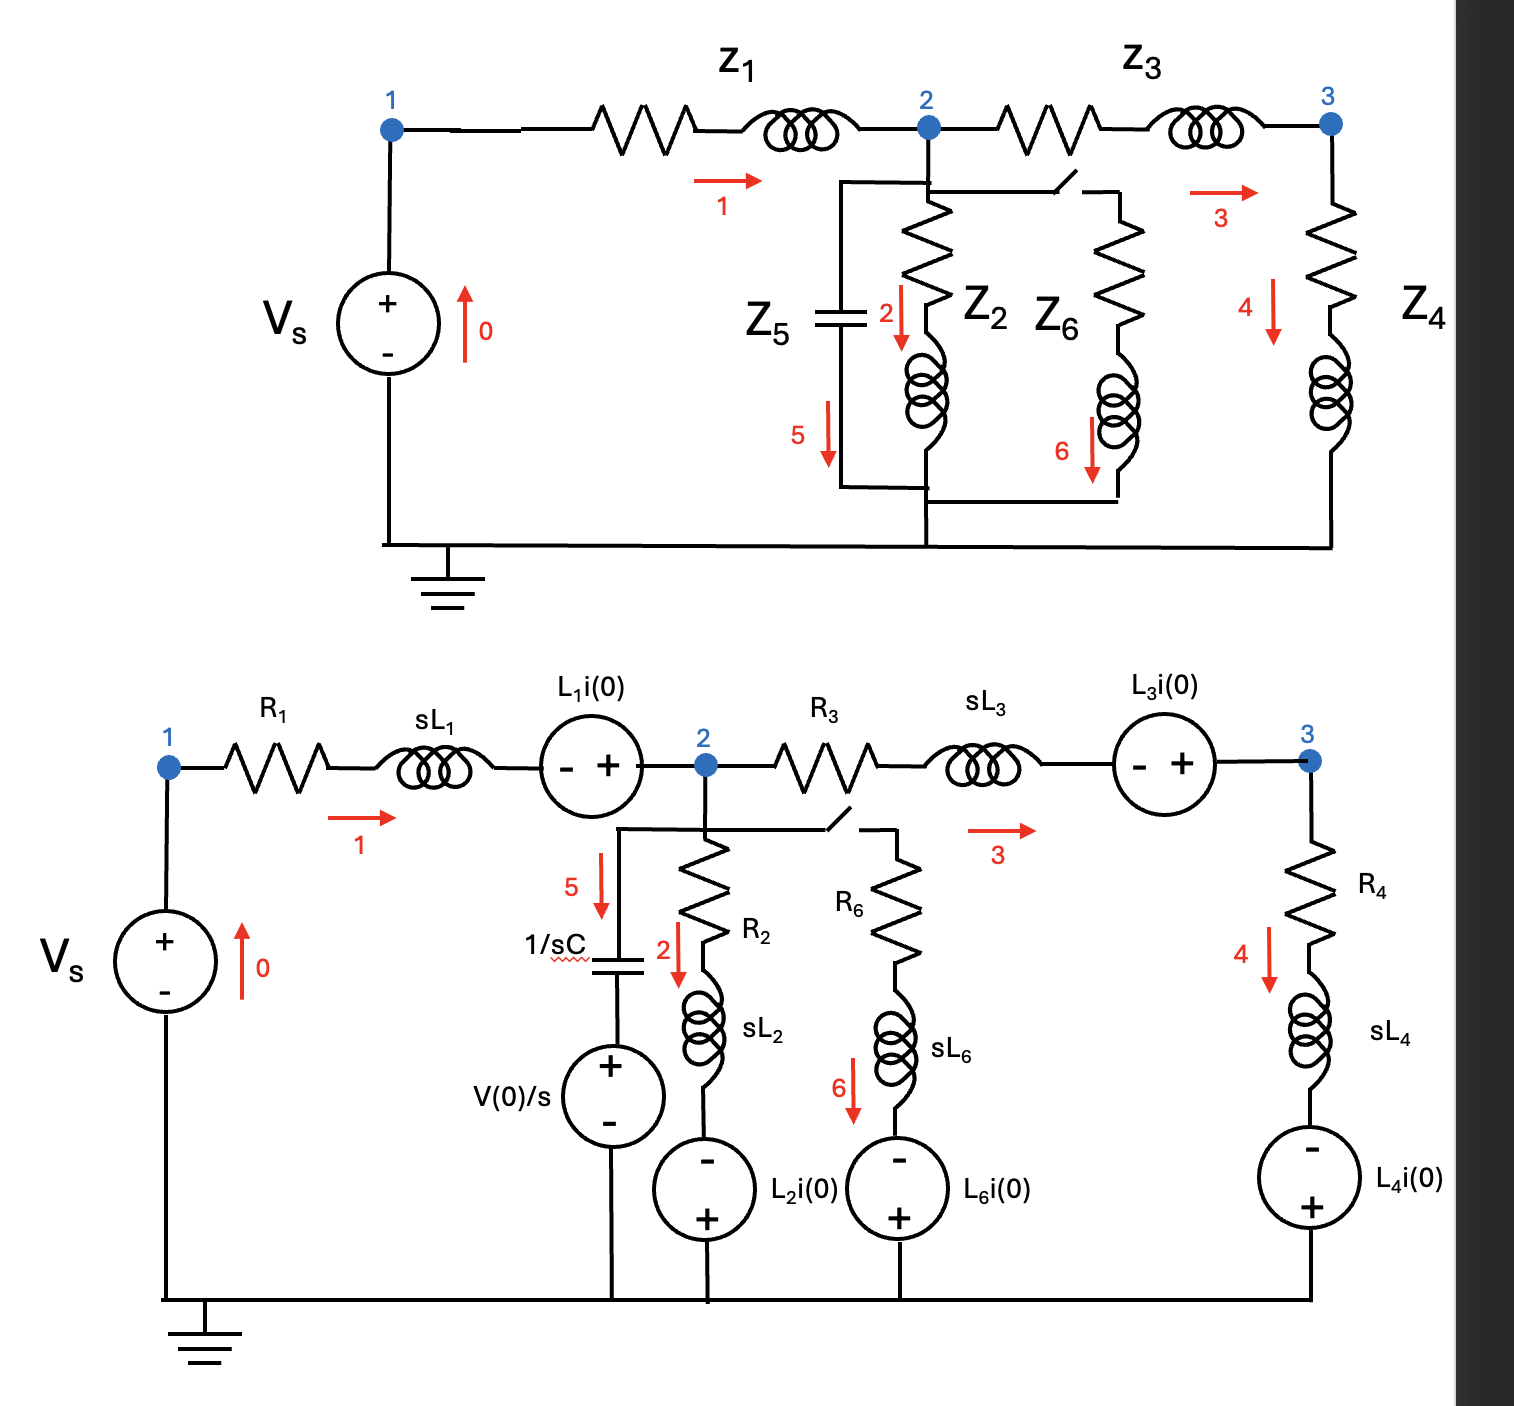

In [123]:
## Simple-er example - broken - try again on a smaller network, to prove the method

import sympy as sp

# constants
Vs = 24
R1 = 0.52546181
R2 = 11.645197
R3 = 0.42304791 
R4 = 10.6606727
R6 = R2
L1 = 0.00186193 
L2 = 0.00506634 
L3 = 0.00131426 
L4 = 0.0029957
L6 = L2
Xc = 92.21
C = 1/2/np.pi/f/Xc

# initial conditions - from KVL on the DC circuit
i2_0 = Vs / (R1 + R1*R2/(R3 + R4) + R2)
i3_0 = i2_0*R2 / (R3 + R4)
i1_0 = i2_0 + i3_0
Vc_0 = i2_0 * R2

# symbols
s, t = sp.symbols('s t')
V2,V3 = sp.symbols('V2 V3')
eq1 = (Vs/s + L1*i1_0 - V2)/(R1 + s*L1) - (V2 + L2*i2_0)/(R2 + s*L2) - (V2 + L3*i3_0 - V3)/(R3 + s*L3) - s*C*V2 + C*Vc_0 - V2/(R6 + s*L6)
eq2 = (V2 + L3*i3_0 - V3)/(R3 + s*L3) - (V3 + L4*i3_0)/(R4 + s*L4)
eq1 = sp.Eq(eq1,0)
eq2 = sp.Eq(eq2,0)
sol = sp.solve([eq1, eq2], [V2, V3])
v2_t = sp.inverse_laplace_transform(sol[V2],s,t)
v3_t = sp.inverse_laplace_transform(sol[V3],s,t)

print(v2_t)
print('----')
print(v3_t)

# Convert to numerical functions
v2_func = sp.lambdify(t, v2_t, 'numpy')
v3_func = sp.lambdify(t, v3_t, 'numpy')

t_vals = np.linspace(0, 10, 1000)  # time from 0 to 10 seconds
x1_vals = v2_func(t_vals[0])
x2_vals = v3_func(t_vals[0])

# plt.figure(figsize=(8, 4))
# plt.plot(t_vals, x1_vals, label='x₁(t)', linewidth=2)
# plt.plot(t_vals, x2_vals, label='x₂(t)', linewidth=2)
# plt.xlabel('Time (s)')
# plt.ylabel('Response')
# plt.title('Time-Domain Responses from Inverse Laplace')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

-8.69196689710708e-7*(4.0868704714829e+15926*(-1.45558452675385e+2538 - 4.30995224245359e+2537*I)*(-1.20812699295401e-1993 - 2.73054227402693e-1993*I)*(-1.0422247700552e-8502 - 6.39545007277426e-8503*I)*(4.15787623159866e-1997 + 2.33497383653917e-1997*I)*(2.06103685276718e+2532 + 2.34113765620306e+2534*I)*(-6233.14789775843*exp(-692.887686923804*t)*sin(6233.14789775843*t) - 692.887686923804*I*exp(-692.887686923804*t)*sin(6233.14789775843*t) - 692.887686923804*exp(-692.887686923804*t)*cos(6233.14789775843*t) + 6233.14789775843*I*exp(-692.887686923804*t)*cos(6233.14789775843*t))*gamma(12466.2957955169*I) + 4.0868704714829e+15926*(-1.45558452675385e+2538 + 4.30995224245359e+2537*I)*(-1.20812699295401e-1993 + 2.73054227402693e-1993*I)*(-1.0422247700552e-8502 + 6.39545007277426e-8503*I)*(4.15787623159866e-1997 - 2.33497383653917e-1997*I)*(2.06103685276718e+2532 - 2.34113765620306e+2534*I)*(-6233.14789775843*exp(-692.887686923804*t)*sin(6233.14789775843*t) + 692.887686923804*I*exp(-692.88768

TypeError: must be real number, not complex

Use the above network but without the parallel load

3*sqrt(2)*exp(-4*t)*sin(sqrt(2)*t)*Heaviside(t)/2
----


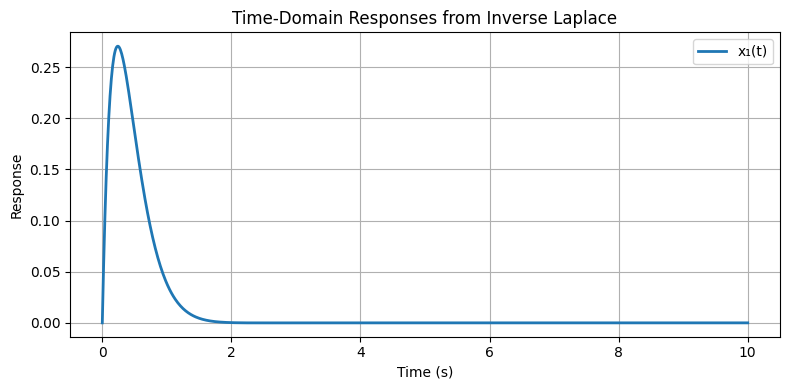

In [128]:
## Simple-er example

import sympy as sp

# constants
Vs = 24
R1 = 0.52546181
R2 = 11.645197
R3 = 0.42304791 
R4 = 10.6606727
R6 = R2
L1 = 0.00186193 
L2 = 0.00506634 
L3 = 0.00131426 
L4 = 0.0029957
L6 = L2
Xc = 92.21
C = 1/2/np.pi/f/Xc

# initial conditions - from KVL on the DC circuit
i2_0 = Vs / (R1 + R2)
Vc_0 = i2_0 * R2

# symbols
s, t = sp.symbols('s t')
V2,V3 = sp.symbols('V2 V3')
# eq1 = (Vs/s + L1*i1_0 - V2)/(R1 + s*L1) - (V2 + L2*i2_0)/(R2 + s*L2) - s*C*V2 + C*Vc_0 - V2/(R6 + s*L6)
eq1 = V2 - 3/(s**2 + 8*s + 18)
eq1 = sp.Eq(eq1,0)
sol = sp.solve([eq1], [V2])
v2_t = sp.inverse_laplace_transform(sol[V2],s,t)

print(v2_t)
print('----')

# Convert to numerical functions
v2_func = sp.lambdify(t, v2_t, 'numpy')

t_vals = np.linspace(0, 10, 1000)  # time from 0 to 10 seconds
x1_vals = v2_func(t_vals)

plt.figure(figsize=(8, 4))
plt.plot(t_vals, x1_vals, label='x₁(t)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Time-Domain Responses from Inverse Laplace')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [117]:
print(R)

print(L)

[ 0.52546181 11.645197    0.42304791 10.6606727   0.73840812  8.72564535
  0.42173474 11.34220941  0.45821185 14.62337338  6.39040936]
[0.00186193 0.00506634 0.00131426 0.0029957  0.00194768 0.00528014
 0.00227784 0.00343888 0.00161646 0.00455303 0.00519087]
